#### word embedding，就是找到一个映射或者函数，生成在一个新的空间上的表达
#### 是一种将源数据映射到另外一个空间

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import sklearn 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

In [2]:
imdb = keras.datasets.imdb
vocab_size = 10000
index_from = 3

# Keras会预处理这些文字，开始字符是1，每个字符都被+3了
# num_words：词频最高的前num_words个词
# index_from：实际使用的词语的索引起始值
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words = vocab_size, index_from = index_from)

In [3]:
print(train_data[0], train_labels[0])
print(train_data.shape, train_labels.shape)
print(len(train_data[0]), len(train_data[1]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32] 1
(25000,) (25000,)
218 189


In [4]:
# 词库
word_index = imdb.get_word_index()
print(len(word_index))

88584


In [5]:
# 词库每个值加3
word_index = {key:(value + 3) for key, value in word_index.items()}
list(word_index.items())[:5]

[('fawn', 34704),
 ('tsukino', 52009),
 ('nunnery', 52010),
 ('sonja', 16819),
 ('vani', 63954)]

In [6]:
# 设置词库的前4个值
# 不够的位数，补0
word_index["<PAD>"] = 0
word_index["<START>"] = 1
# 识别不了的，用UNK
word_index["<UNK>"] = 2
word_index["<END>"] = 3

# 词库的key和value交换位置
reverse_word_index = {value:key for key, value in word_index.items()}

# 在词库中，取得对应的单词
def decode(data):
    return " ".join([reverse_word_index.get(index, "<UNK>") for index in data])

In [7]:
# 查看对应的内容
decode(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [8]:
# 涉资最大长度
maxlen=500

# 补齐长度
train_data = keras.preprocessing.sequence.pad_sequences(
    train_data,
    maxlen=maxlen,
    dtype='int32',
    padding='post',
    truncating='pre',
    value=0.0,)

test_data = keras.preprocessing.sequence.pad_sequences(
    test_data,
    maxlen=maxlen,
    dtype='int32',
    padding='post',
    truncating='pre',
    value=0.0,)

In [9]:
train_data[0]

array([   1,   14,   22,   16,   43,  530,  973, 1622, 1385,   65,  458,
       4468,   66, 3941,    4,  173,   36,  256,    5,   25,  100,   43,
        838,  112,   50,  670,    2,    9,   35,  480,  284,    5,  150,
          4,  172,  112,  167,    2,  336,  385,   39,    4,  172, 4536,
       1111,   17,  546,   38,   13,  447,    4,  192,   50,   16,    6,
        147, 2025,   19,   14,   22,    4, 1920, 4613,  469,    4,   22,
         71,   87,   12,   16,   43,  530,   38,   76,   15,   13, 1247,
          4,   22,   17,  515,   17,   12,   16,  626,   18,    2,    5,
         62,  386,   12,    8,  316,    8,  106,    5,    4, 2223, 5244,
         16,  480,   66, 3785,   33,    4,  130,   12,   16,   38,  619,
          5,   25,  124,   51,   36,  135,   48,   25, 1415,   33,    6,
         22,   12,  215,   28,   77,   52,    5,   14,  407,   16,   82,
          2,    8,    4,  107,  117, 5952,   15,  256,    4,    2,    7,
       3766,    5,  723,   36,   71,   43,  530,  4

In [10]:
embedding_dim = 16

# 嵌入层被定义为网络的第一个隐藏层。
# input_dim：这是文本数据中词汇的取值可能数
# output_dim：这是嵌入单词的向量空间的大小，它为每个单词定义了这个层的输出向量的大小。
# input_length：这是输入序列的长度，就像您为Keras模型的任何输入层所定义的一样，也就是一次输入带有的词汇个数。
model = keras.models.Sequential([
    keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim, input_length =maxlen),
    
    # 池化层
    # 输入得数据格式为：(batch_size, maxlen, output_dim) => 输出得数据格式为：(batch_size, output_dim)
    # 取消了maxlen
    keras.layers.GlobalAveragePooling1D(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

# Embedding: maxlen * output_dim (500 * 16)
#            batch_size * maxlen * output_dim  (128 * 500 * 16)
# GlobalAveragePooling1D: batch_size * output_dim (128 * 16)

# input_dim * output_dim = 16 * 10000 = 160000
# 64 * output_dim + 64 = 1088
# 64 * 1 + 1 = 65

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 500, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                1088      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 161,153
Trainable params: 161,153
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [12]:
train_data.shape

(25000, 500)

In [13]:
callbacks = [keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3)]
history = model.fit(train_data, train_labels, epochs=20, validation_split=0.3, batch_size=128)
# 25000 * 0.8 / 128 = 156.25

Epoch 1/20
137/137 [==============================] - 1s 9ms/step - loss: 0.6863 - accuracy: 0.5981 - val_loss: 0.6642 - val_accuracy: 0.6507
Epoch 2/20
137/137 [==============================] - 1s 8ms/step - loss: 0.5747 - accuracy: 0.7846 - val_loss: 0.4756 - val_accuracy: 0.8308
Epoch 3/20
137/137 [==============================] - 1s 9ms/step - loss: 0.3889 - accuracy: 0.8679 - val_loss: 0.3658 - val_accuracy: 0.8523
Epoch 4/20
137/137 [==============================] - 1s 8ms/step - loss: 0.2967 - accuracy: 0.8930 - val_loss: 0.3104 - val_accuracy: 0.8819
Epoch 5/20
137/137 [==============================] - 1s 8ms/step - loss: 0.2485 - accuracy: 0.9106 - val_loss: 0.2989 - val_accuracy: 0.8808
Epoch 6/20
137/137 [==============================] - 1s 8ms/step - loss: 0.2190 - accuracy: 0.9216 - val_loss: 0.2857 - val_accuracy: 0.8895
Epoch 7/20
137/137 [==============================] - 1s 8ms/step - loss: 0.1939 - accuracy: 0.9317 - val_loss: 0.2786 - val_accuracy: 0.8928
Epoch 

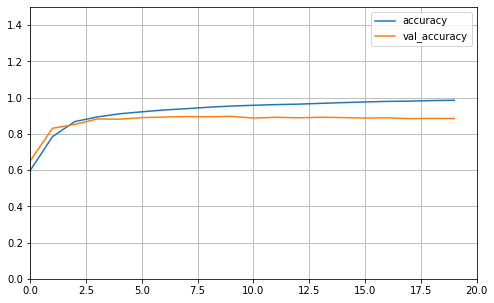

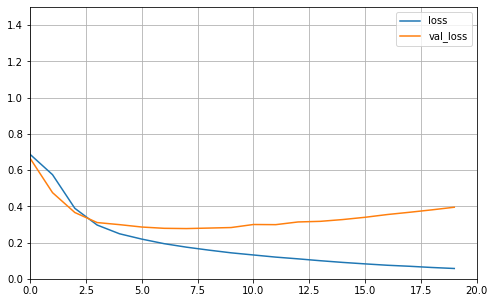

In [14]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', 20, 0, 1.5)
plot_learning_curves(history, 'loss', 20, 0, 1.5)

In [15]:
model.evaluate(test_data, test_labels, batch_size=128)

196/196 [==============================] - 0s 2ms/step - loss: 0.4283 - accuracy: 0.8706


[0.4283047914505005, 0.870639979839325]